In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if os.getcwd() != '/home/jupyter/crisp':
    os.chdir("..")
%pwd

'/home/jupyter/crisp'

In [3]:
from utils.gcp_helpers import get_dataframe_from_bucket

In [4]:
data = get_dataframe_from_bucket("Radiation/mouse/combined/mouse.combined.expression.071121.tsv","ah21_data", "ah21_data", sep="\t")
view = data.T
view.columns = view.iloc[0].to_list()
view = view.iloc[1:]

In [5]:
metadata = get_dataframe_from_bucket("Radiation/mouse/combined/mouse.metadata.combined.071121.csv","ah21_data", "ah21_data", sep=",")

In [6]:
metadata.timepoint_hr.value_counts()
# could potentially ignore timepoints for now?
# could use as an environment? 
# environment axes as both timepoints and datasets?

24     98
48     50
72     50
120    50
168    48
6      18
Name: timepoint_hr, dtype: int64

In [7]:
meta_columns = metadata.columns
datasets = list(metadata.dataset.unique())
radstates = list(metadata.irradiated.unique())

rad_dict = {}
for r in radstates:
    rad_dict[r] = view.loc[metadata[metadata.irradiated == r]['sample']]

dataset_mice = {}
for d in datasets:
    dataset_mice[d] = view.loc[metadata[metadata.dataset == d]['sample']]

In [8]:
for m in meta_columns:
    check_nan = (metadata[metadata[m].isnull()])
# no nan values found in the mice

In [9]:
value_matrix = {}
for d in datasets:
    value_matrix[d] = metadata[metadata.dataset == d].irradiated.value_counts()
pd.DataFrame(value_matrix)
# mix of radiates vs irradiated in both experimental settings

,GLDS156,GSE124612,GSE62623
Yes,11,202,36
No,7,46,12


In [10]:
value_matrix = {}
for d in datasets:
    value_matrix[d] = metadata[metadata.dataset == d].timepoint_hr.value_counts()
pd.DataFrame(value_matrix)    
# only one experiment has variation in radiation time

,GLDS156,GSE124612,GSE62623
6,18.0,NaN,NaN
24,NaN,50.0,48.0
48,NaN,50.0,NaN
72,NaN,50.0,NaN
120,NaN,50.0,NaN
168,NaN,48.0,NaN


In [11]:
value_matrix = {}
for d in datasets:
    value_matrix[d] = metadata[metadata.dataset == d].dose_Gy.value_counts()
pd.DataFrame(value_matrix)    
# only one experiment has variation in radiation time
# what kind of doses are relavent? In space flight, you are looking at up to half a grey of particles or one gray of gamma rays
# anything more than that will be more than what you will get in a 3 year mars mission
# gamma rays are used in nuclear attacks
# cosmic rays are particle radiation! all of your radiation are rays in the em spectrum! They do not mimic space radaion in quite the same way as particles
# the effects of rays on cells is much less 
# medical rays are going to be grays provided very rapidly.
# a lot of datasets come from thigns like this
# a dataset may also come from imitating a neuclear attack - in this case all the radiation is provided at once

,GLDS156,GSE124612,GSE62623
0.0,7.0,46.0,12.0
1.0,NaN,4.0,12.0
1.5,NaN,50.0,NaN
2.0,5.0,NaN,12.0
3.0,NaN,50.0,NaN
4.0,NaN,NaN,12.0
6.0,NaN,50.0,NaN
8.0,6.0,NaN,NaN
10.0,NaN,48.0,NaN


In [ ]:
# seivert takes into account biological effect of radiation. It uses gamma as a unit - it will adjust for the particle for particle biological effects
# eg one gray is one seivert for gamma rays, but five seiverts for a neutron - it's also adjusted for the tissue. 
# a one gray neutron may go up to 20 seiverts if it's applied to a particularly sensitive tissue
# this makes it a very imprecise measurement however. It's estimated from cell line in cell death. 
# however it's one of the few ways of trying to translate the effect of particle radiation

# you don't need to have mice in space! there is data in brookhaven that has iron and proton radiation - this will look much more like cosmic rays

In [13]:
value_matrix = {}
for d in datasets:
    value_matrix[d] = metadata[metadata.dataset == d].radiation.value_counts()
pd.DataFrame(value_matrix)    
# only one experiment has variation in radiation time

,GLDS156,GSE124612,GSE62623
Control,7.0,46.0,12.0
High-dose-rate_Xray,NaN,NaN,18.0
Low-dose-rate_Xray,NaN,NaN,18.0
gamma,11.0,202.0,NaN


In [ ]:
# comparing same dose rate of Xray and gamma ray: the effects should honestly be pretty much the same. They're both photons
# purists will insist their different, but the difference will be small enough
# dose rate however is very very different. Acute is 1 a minute. Chronic might look like one gray a week, or over months! 
# Properly look at the papers on what the exposure times are. 
# chronic exposure can drive buildup and oxidative stress
# acute might more likely trigger apoptotic events
# Elge can tell us what the dose rate is if you ask her
# things like colbalt plates radiate gamma v slowly. Ask Elge on specifics
# if the paper does not say, assume acute
# acute is 1.03 grays per minute
# chronic is 3.09 miligrays per minute
# chronic is MUCH MORE RELAVENT FOR SPACE! chronic is much more relavent for space given you get it over this longer period
# chronic radiation is harder to model on earth. Harder to create a chronic radiator than an acute radiator. 

# the GSE stuff looks like it will be acute data. 
# there isn't a system that can provide 10 gray chronically - so current gamma rays in data are all acute.
# drop low-dose-rate Xray mice for now!
# your interpretation of 10 gray is relavent for therapeutics and nuclear diseasters, but too high for space 
# big solar storms are like 2 grays if unshielded, unless you have a historically bad ones. They are in the range of 1/2 to 2 
# solar storm events are mostly protons but not gamma rays
# particles are better at causing DNA breaks and oxidative stress thant photons
# there are experiments that specifically model solar storms

# the gene groups involved in DNA repair for space radiation:
# genes in double strand repair 
# oxidative stress reduction genes
# tissue-dependend genes (particularly in regards to inflammation) - we'll see this given we're looking at blood! WBC time :')
# if you don't see any oxidative stress genes or double strand repair genes, something is probably up.

In [15]:
GSE6_matrix = {}
subdata = metadata[metadata.dataset == 'GSE62623']
for m in subdata.radiation.unique():
    GSE6_matrix[m] = subdata[subdata.radiation == m].dose_Gy.value_counts()
pd.DataFrame(GSE6_matrix)
# y axis is radiation dose
# x axis is how long they left them?

,Control,High-dose-rate_Xray,Low-dose-rate_Xray
0.0,12.0,NaN,NaN
1.0,NaN,6.0,6.0
2.0,NaN,6.0,6.0
4.0,NaN,6.0,6.0


In [193]:
GSE12_matrix = {}
subdata = metadata[metadata.dataset == 'GSE124612']
for m in subdata.timepoint_hr.unique():
    GSE12_matrix[m] = subdata[subdata.timepoint_hr == m].dose_Gy.value_counts()
pd.DataFrame(GSE12_matrix)
# y axis is radiation dose
# x axis is how long they left them?

,24,48,72,120,168
0.0,6,10.0,10.0,10.0,10.0
1.0,4,NaN,NaN,NaN,NaN
1.5,10,10.0,10.0,10.0,10.0
3.0,10,10.0,10.0,10.0,10.0
6.0,10,10.0,10.0,10.0,10.0
10.0,10,10.0,10.0,10.0,8.0


In [199]:
subdata.radiation.value_counts()

gamma      202
Control     46
Name: radiation, dtype: int64

In [200]:
subdata.gender.value_counts()

male    248
Name: gender, dtype: int64

In [201]:
subdata.strain.value_counts()

C57BL/6    248
Name: strain, dtype: int64

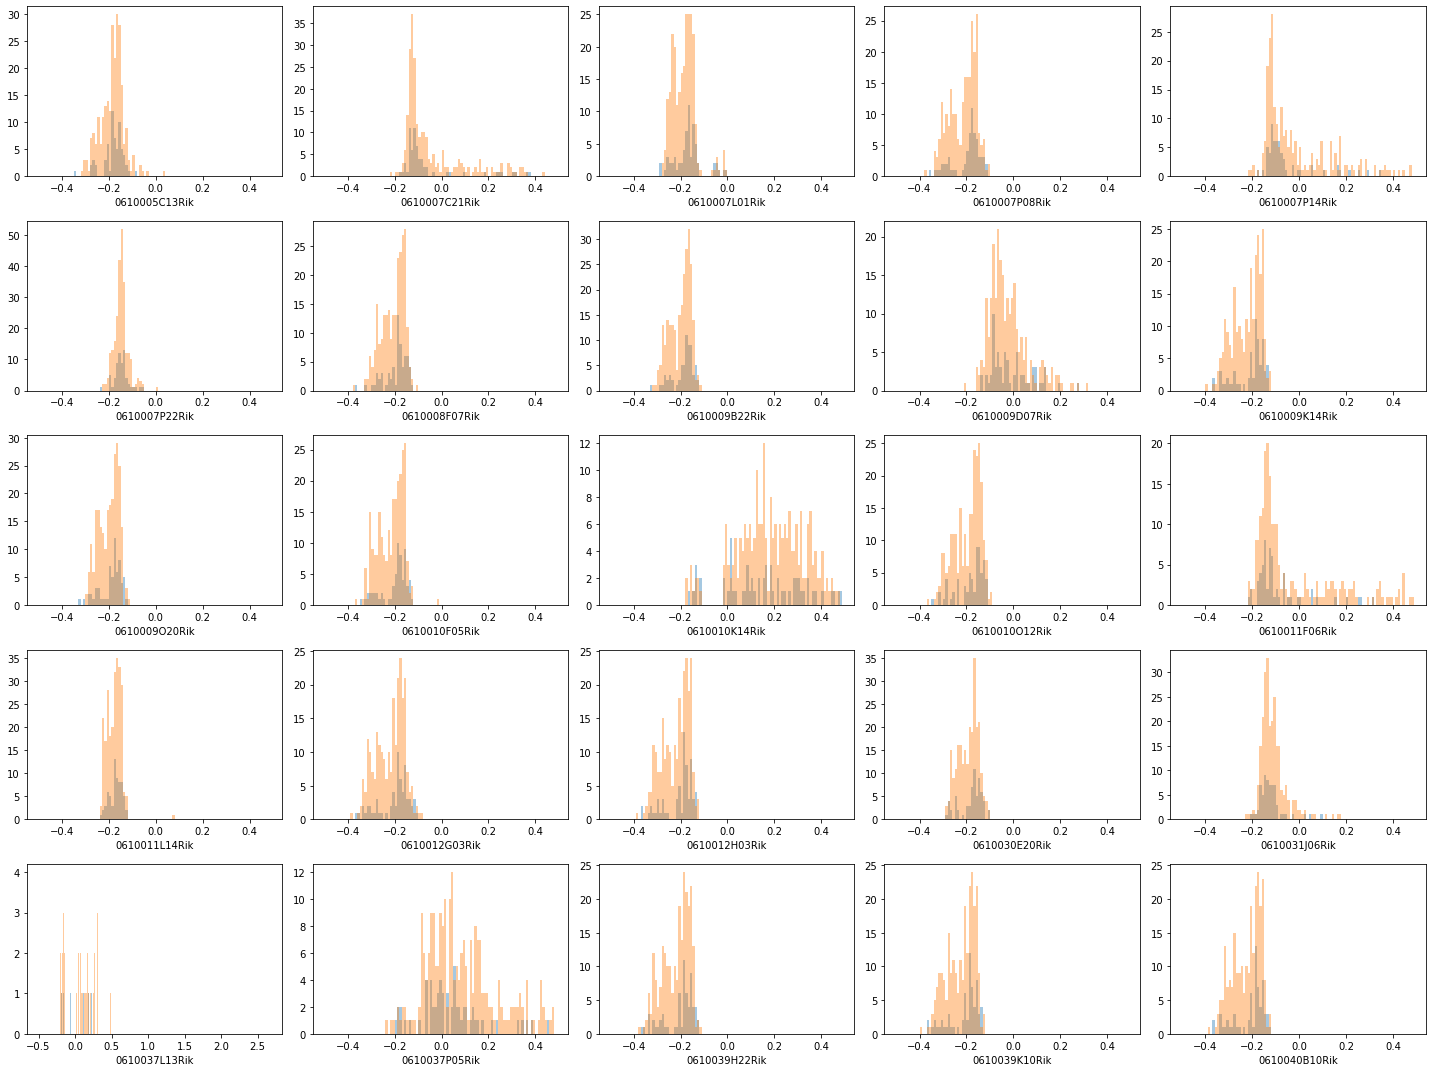

In [158]:
fig, axs = plt.subplots(5,5, figsize=(20,15))
idx = 0
for i in range(5):
    for j in range(5):
        for r in rad_dict:
            gene = rad_dict[r].T.iloc[idx]
            sns.distplot(gene, bins=np.arange(-.5, .5, 0.01), ax=axs[i,j], kde=False)
        ax.set_xlim(-0.5,0.5)
        idx += 1
plt.tight_layout()

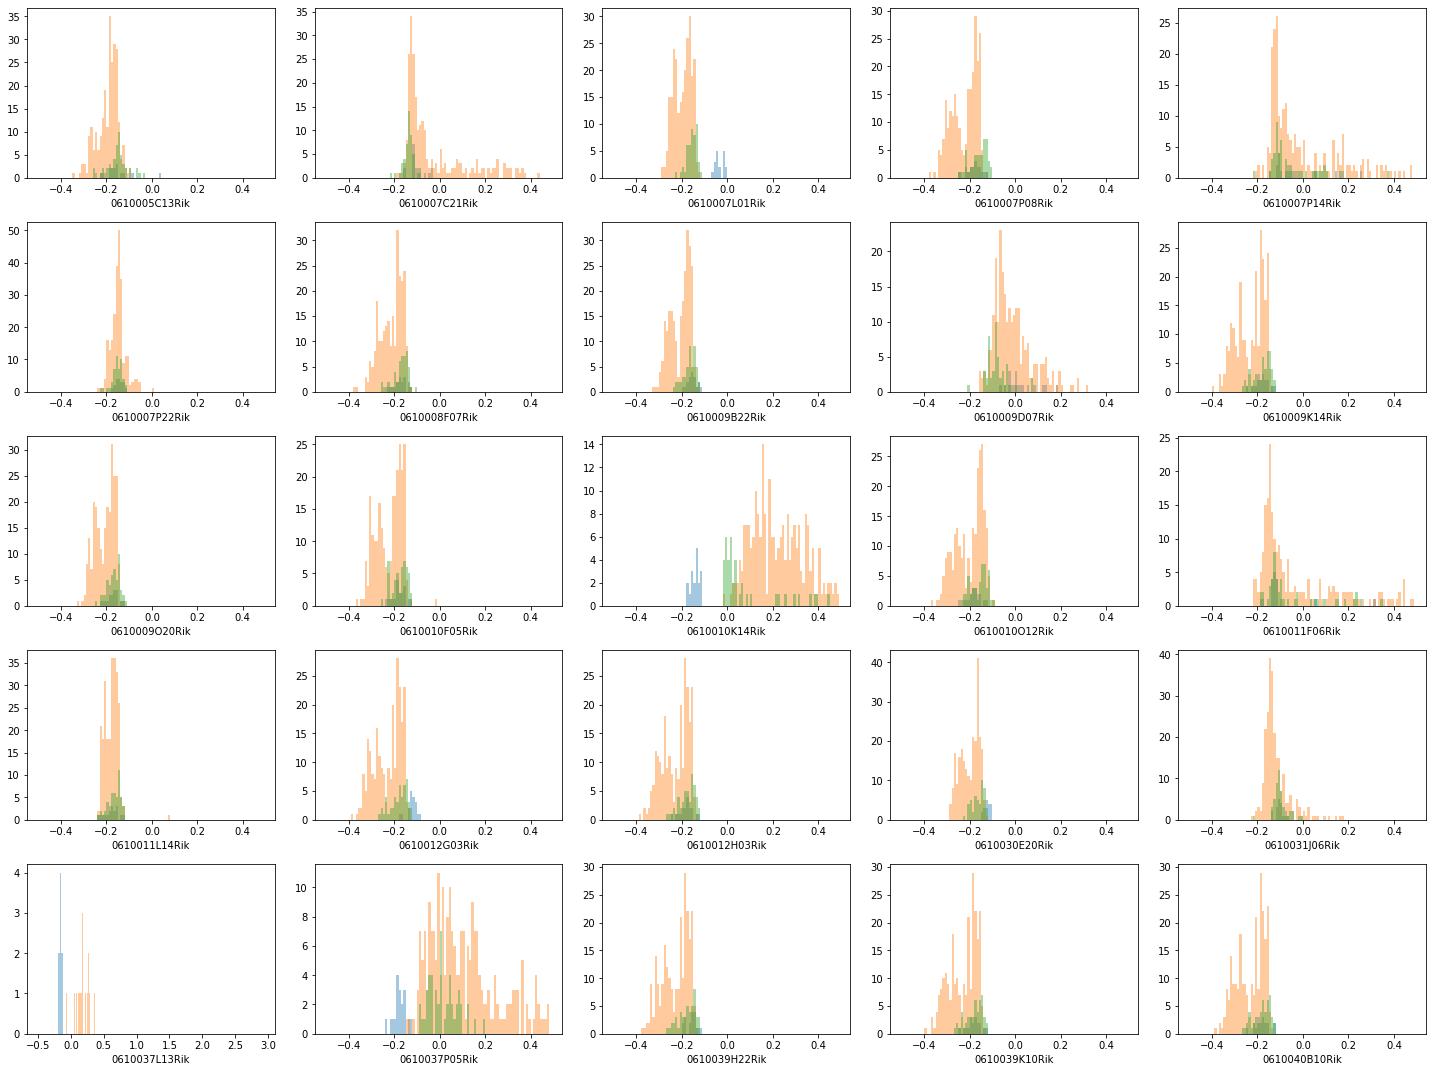

In [157]:
fig, axs = plt.subplots(5,5, figsize=(20,15))
idx = 0
for i in range(5):
    for j in range(5):
        for dataset in dataset_mice:
            gene = dataset_mice[dataset].T.iloc[idx]
            sns.distplot(gene, bins=np.arange(-.5, .5, 0.01), ax=axs[i,j], kde=False)
        ax.set_xlim(-0.5,0.5)
        idx += 1
plt.tight_layout()

(-0.5, 0.5)

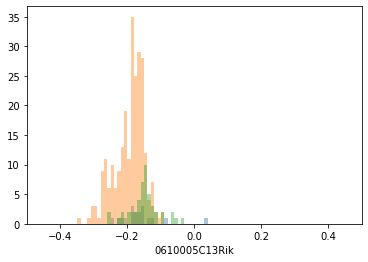

In [110]:
listo = []
for d in datasets:
    listo.append(view.loc[metadata[metadata.dataset == d]['sample']].T.iloc[var])

fig, ax = plt.subplots()
for a in listo:
    sns.distplot(a, bins=np.arange(-.5, .5, 0.01), ax=ax, kde=False)
ax.set_xlim([-0.5, 0.5])